In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re

In [2]:
df = pd.read_csv('src/us_sentiment_models.csv')
df

,Unnamed: 0,date,cases_daily,tweets_daily,cases_total,tweets_total,sentiment_afn,sentiment_ensemble,sentiment_textblob,sentiment_vader
0,0,1/22/20,1,5070,1,5070,-0.229980,-0.168639,0.416963,-0.052268
1,1,1/23/20,0,24718,1,29788,-0.471438,-0.404321,0.194959,-0.264139
2,2,1/24/20,1,74806,2,104594,-0.206374,-0.134307,0.252480,0.007633
3,3,1/25/20,0,84869,2,189463,-0.296810,-0.220988,0.206506,-0.056723
4,4,1/26/20,3,108192,5,297655,-0.249704,-0.197991,0.203046,-0.090386
...,...,...,...,...,...,...,...,...,...,...
102,102,5/4/20,22335,115686,1180375,13601803,-0.163468,-0.106193,0.134251,-0.048433
103,103,5/5/20,23976,122299,1204351,13724102,-0.169094,-0.105504,0.179961,-0.034457
104,104,5/6/20,24980,124662,1229331,13848764,-0.160915,-0.101089,0.164068,-0.044504
105,105,5/7/20,27692,118802,1257023,13967566,-0.132329,-0.079519,0.174728,-0.020378


## Correlation Heatmap

In [3]:
# vader 
df_corr = df[['date', 'sentiment_afn', 'tweets_daily', 'cases_daily']]
df_corr

,date,sentiment_afn,tweets_daily,cases_daily
0,1/22/20,-0.229980,5070,1
1,1/23/20,-0.471438,24718,0
2,1/24/20,-0.206374,74806,1
3,1/25/20,-0.296810,84869,0
4,1/26/20,-0.249704,108192,3
...,...,...,...,...
102,5/4/20,-0.163468,115686,22335
103,5/5/20,-0.169094,122299,23976
104,5/6/20,-0.160915,124662,24980
105,5/7/20,-0.132329,118802,27692


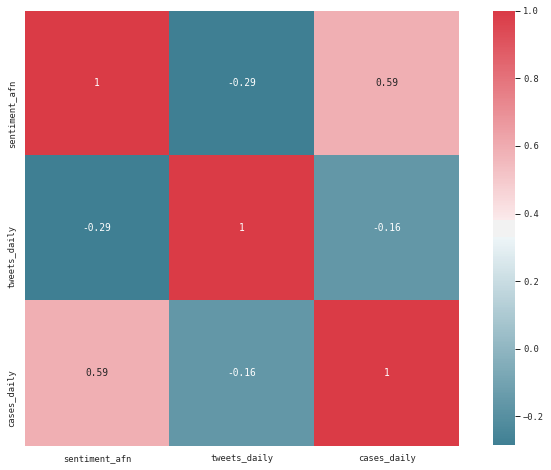

In [4]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
df_corr_matrix = df_corr.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(df_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True )

## Correlation lineplot

In [5]:
# view data in every # of rows
# every 5 rows
df_tweets_cases_select = df.iloc[::5, :]
df_tweets_cases_select

,Unnamed: 0,date,cases_daily,tweets_daily,cases_total,tweets_total,sentiment_afn,sentiment_ensemble,sentiment_textblob,sentiment_vader
0,0,1/22/20,1,5070,1,5070,-0.229980,-0.168639,0.416963,-0.052268
5,5,1/27/20,0,101503,5,399158,-0.393131,-0.274012,0.213117,-0.118903
10,10,2/1/20,1,58263,8,1120017,-0.266825,-0.184182,0.132983,-0.080240
15,15,2/6/20,0,87851,11,1630998,-0.294419,-0.246360,0.086726,-0.169822
20,20,2/11/20,1,166505,12,2372125,-0.366854,-0.345815,0.033795,-0.281163
25,25,2/16/20,0,95478,13,2973001,-0.190222,-0.128700,0.084700,-0.070278
30,30,2/21/20,2,154354,15,3658804,-0.254493,-0.225663,0.229200,-0.174521
35,35,2/27/20,1,270173,16,4462109,-0.289037,-0.250588,0.060328,-0.154949
40,40,3/3/20,20,395178,73,6970782,-0.192862,-0.152716,0.203172,-0.059120
45,45,3/8/20,114,105454,450,7765907,-0.170937,-0.127809,0.139293,-0.092258


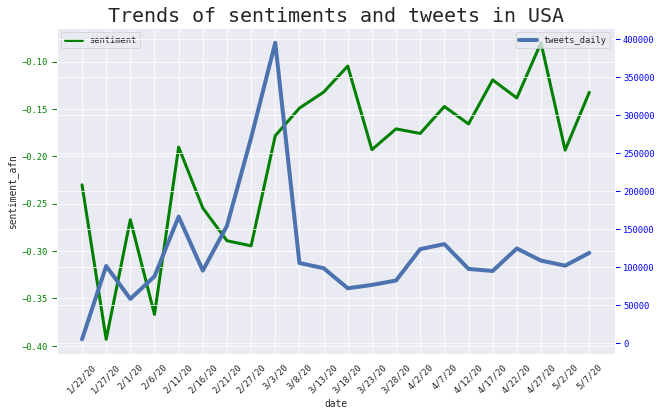

In [6]:
# plot every 5 rows
plt.figure(figsize=(10, 6))
ax_pos = sns.lineplot(x='date',
                      y='sentiment_afn', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='tweets_daily',
                     ax=ax2,
                     label='tweets_daily', 
                     style='b',
                     lw=4)
ax2.tick_params(axis='y', colors='blue')

plt.title("Trends of sentiments and tweets in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()

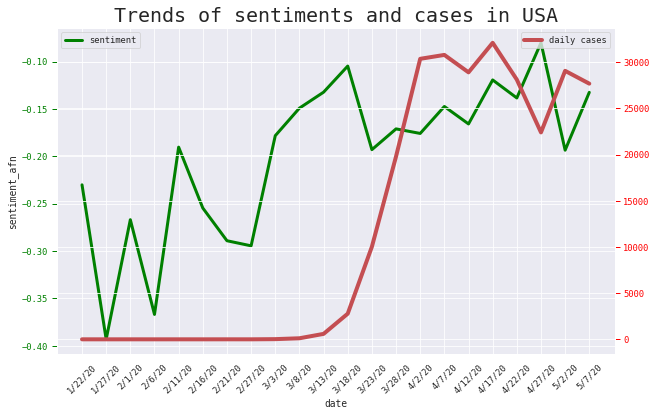

In [7]:
# plot every 5 rows
plt.figure(figsize=(10,6))
ax_pos = sns.lineplot(x='date',
                      y='sentiment_afn', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='r',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()

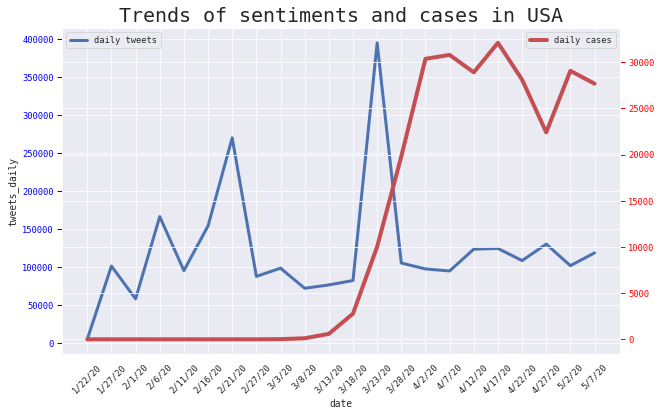

In [8]:
# plot every 5 rows
# Trends of sentiments and cases in USA
plt.figure(figsize=(10, 6))
ax_pos = sns.lineplot(x='date',
                      y='tweets_daily', 
                      data=df_tweets_cases_select,
                      label='daily tweets',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='blue')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='r',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=20, ha='center')
plt.xticks(rotation=45)
plt.show()